In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

# Add parent directory to path to import config
sys.path.append(str(Path().resolve().parent))
from config import DATA_DIR

data_folder = str(DATA_DIR) + "\\"

In [2]:
# Load and combine UCI heart disease datasets
column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]

# Load the three datasets
file1 = data_folder + "processed.cleveland.data"
file2 = data_folder + "processed.hungarian.data"
file3 = data_folder + "processed.switzerland.data"

# Read each dataset
cleveland_df = pd.read_csv(file1, header=None, names=column_names)
hungarian_df = pd.read_csv(file2, header=None, names=column_names)
switzerland_df = pd.read_csv(file3, header=None, names=column_names)

# Combine all datasets
# df = pd.concat([cleveland_df, hungarian_df, switzerland_df], ignore_index=True)
df = cleveland_df
# Convert "?" to NaN and handle missing values
df.replace("?", np.nan, inplace=True)

print(f"Combined dataset shape: {df.shape}")
print(f"Missing values per column:\n{df.isnull().sum()}")
df.head()

Combined dataset shape: (303, 14)
Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [5]:
from sklearn.impute import SimpleImputer

df = df.dropna(subset=["target"])

df = df.apply(pd.to_numeric, errors='coerce')
imputer = SimpleImputer(strategy="mean")
df[:] = imputer.fit_transform(df)


categorical_cols = ['cp', 'restecg', 'slope', 'thal', 'ca']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

target_labels = {
    0: "No Disease",
    1: "Mild",
    2: "Moderate",
    3: "Severe",
    4: "Very Severe"
}

df_encoded['target'] = df_encoded['target'].apply(lambda x: 0 if x == 0 else 1)

df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    303 non-null    float64
 1   sex                    303 non-null    float64
 2   trestbps               303 non-null    float64
 3   chol                   303 non-null    float64
 4   fbs                    303 non-null    float64
 5   thalach                303 non-null    float64
 6   exang                  303 non-null    float64
 7   oldpeak                303 non-null    float64
 8   target                 303 non-null    int64  
 9   cp_2.0                 303 non-null    bool   
 10  cp_3.0                 303 non-null    bool   
 11  cp_4.0                 303 non-null    bool   
 12  restecg_1.0            303 non-null    bool   
 13  restecg_2.0            303 non-null    bool   
 14  slope_2.0              303 non-null    bool   
 15  slope_

In [6]:
from sklearn.preprocessing import StandardScaler

# Define the columns to scale
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

df_encoded.info()
df_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    303 non-null    float64
 1   sex                    303 non-null    float64
 2   trestbps               303 non-null    float64
 3   chol                   303 non-null    float64
 4   fbs                    303 non-null    float64
 5   thalach                303 non-null    float64
 6   exang                  303 non-null    float64
 7   oldpeak                303 non-null    float64
 8   target                 303 non-null    int64  
 9   cp_2.0                 303 non-null    bool   
 10  cp_3.0                 303 non-null    bool   
 11  cp_4.0                 303 non-null    bool   
 12  restecg_1.0            303 non-null    bool   
 13  restecg_2.0            303 non-null    bool   
 14  slope_2.0              303 non-null    bool   
 15  slope_

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_2.0,...,restecg_2.0,slope_2.0,slope_3.0,thal_4.73421926910299,thal_6.0,thal_7.0,ca_0.6722408026755853,ca_1.0,ca_2.0,ca_3.0
0,0.948726,1.0,0.757525,-0.264900,1.0,0.017197,0.0,1.087338,0,False,...,True,False,True,False,True,False,False,False,False,False
1,1.392002,1.0,1.611220,0.760415,0.0,-1.821905,1.0,0.397182,1,False,...,True,True,False,False,False,False,False,False,False,True
2,1.392002,1.0,-0.665300,-0.342283,0.0,-0.902354,1.0,1.346147,1,False,...,True,True,False,False,False,True,False,False,True,False
3,-1.932564,1.0,-0.096170,0.063974,0.0,1.637359,0.0,2.122573,0,False,...,False,False,True,False,False,False,False,False,False,False
4,-1.489288,0.0,-0.096170,-0.825922,0.0,0.980537,0.0,0.310912,0,True,...,True,False,False,False,False,False,False,False,False,False


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from config import CLEANED_DATA_PATH

# Load the cleaned data for visualization
df = pd.read_csv(CLEANED_DATA_PATH)

df.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target
count,3.030000e+02,303.000000,3.030000e+02,3.030000e+02,303.000000,3.030000e+02,303.000000,3.030000e+02,303.000000
mean,1.905333e-17,0.679868,4.543487e-16,2.418308e-16,0.148515,-1.172513e-16,0.326733,2.345026e-17,0.458746
std,1.001654e+00,0.467299,1.001654e+00,1.001654e+00,0.356198,1.001654e+00,0.469794,1.001654e+00,0.499120
min,-2.819115e+00,0.000000,-2.145037e+00,-2.334877e+00,0.000000,-3.442067e+00,0.000000,-8.968617e-01,0.000000
25%,-7.135564e-01,0.000000,-6.652997e-01,-6.905030e-01,0.000000,-7.053073e-01,0.000000,-8.968617e-01,0.000000
50%,1.729945e-01,1.000000,-9.616980e-02,-1.101357e-01,0.000000,1.485618e-01,0.000000,-2.067053e-01,0.000000
75%,7.270888e-01,1.000000,4.729601e-01,5.476139e-01,0.000000,7.178079e-01,1.000000,4.834512e-01,1.000000
max,2.500191e+00,1.000000,3.887739e+00,6.138485e+00,1.000000,2.294182e+00,1.000000,4.451851e+00,1.000000


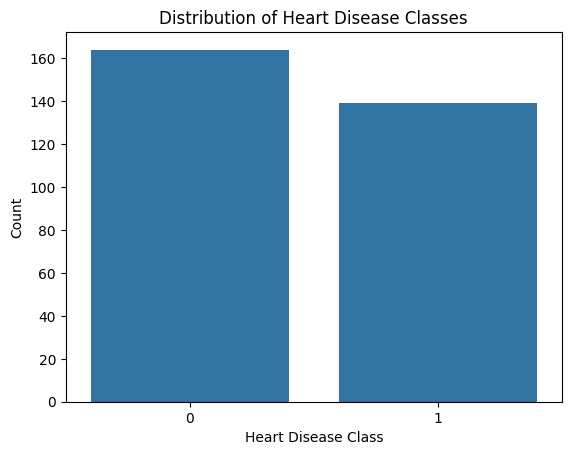

In [8]:
sns.countplot(data=df, x='target')
plt.title("Distribution of Heart Disease Classes")
plt.xlabel("Heart Disease Class")
plt.ylabel("Count")
plt.show()


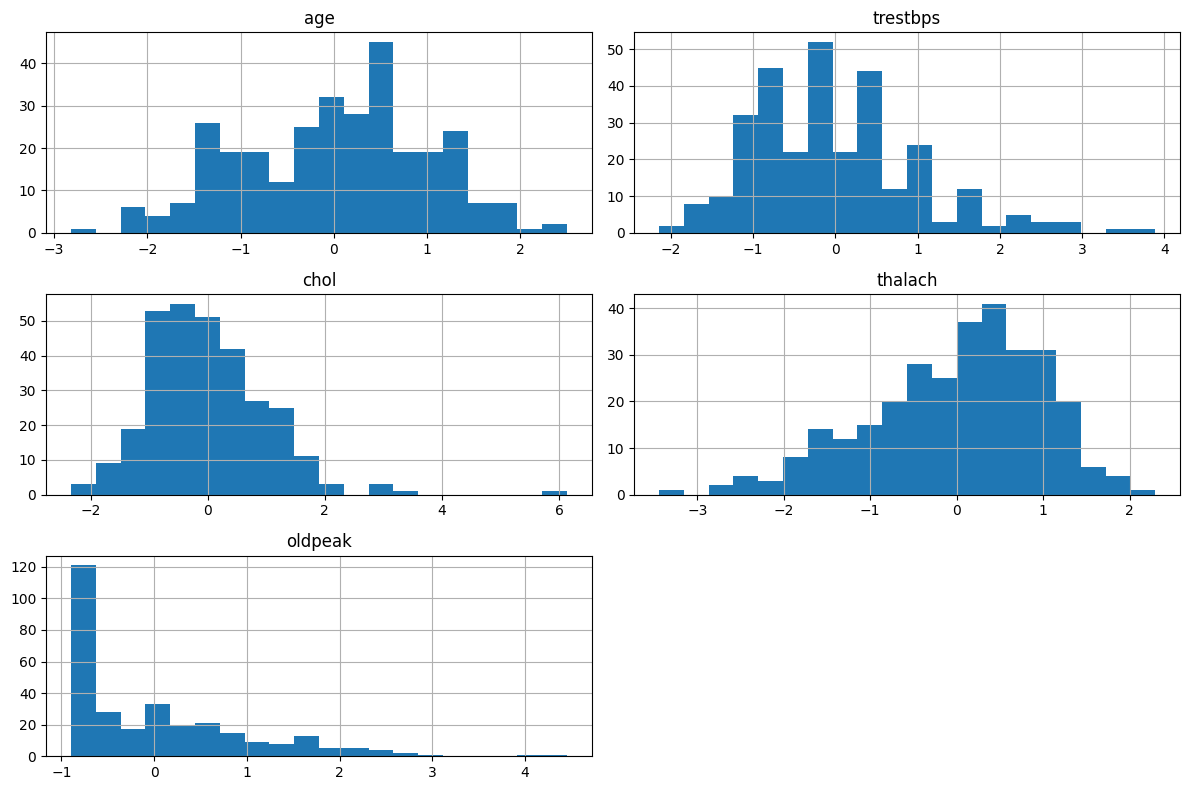

In [9]:
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()


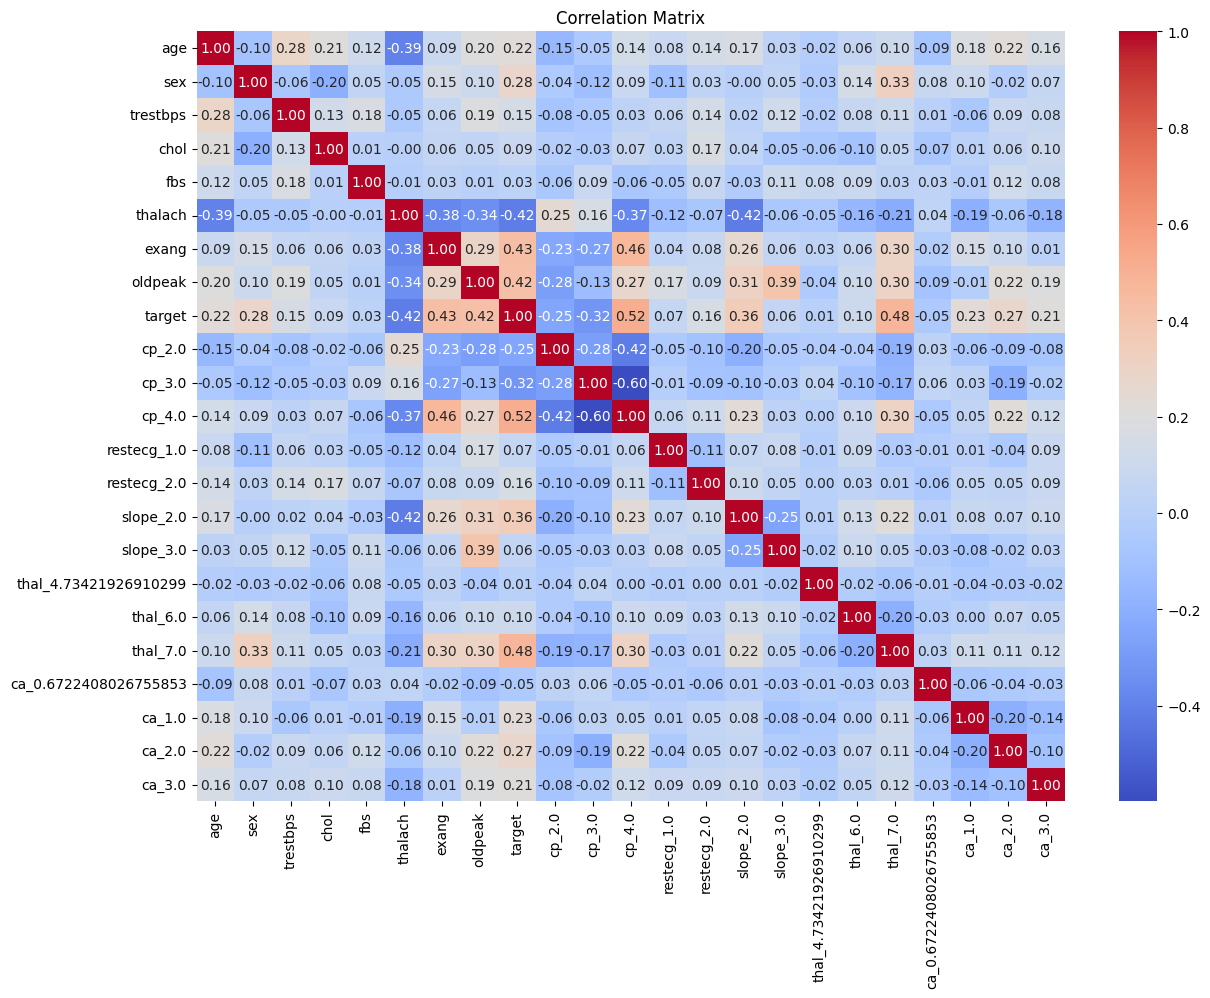

In [10]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


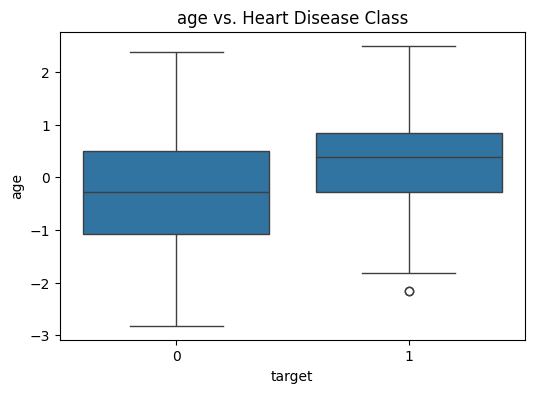

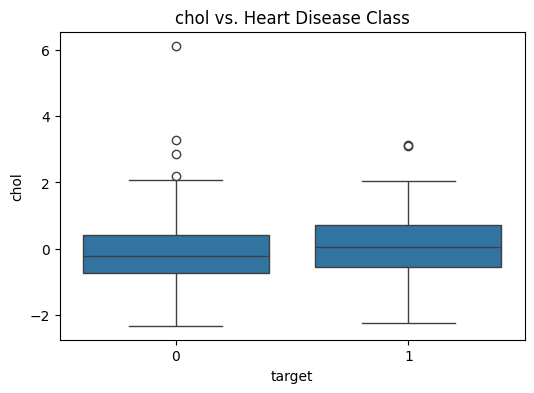

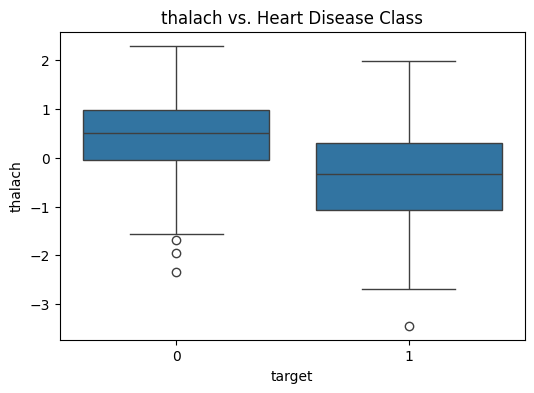

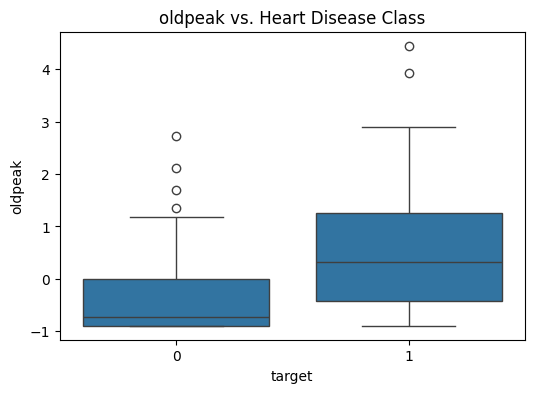

In [11]:
features_to_plot = ['age', 'chol', 'thalach', 'oldpeak']

for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f"{feature} vs. Heart Disease Class")
    plt.show()


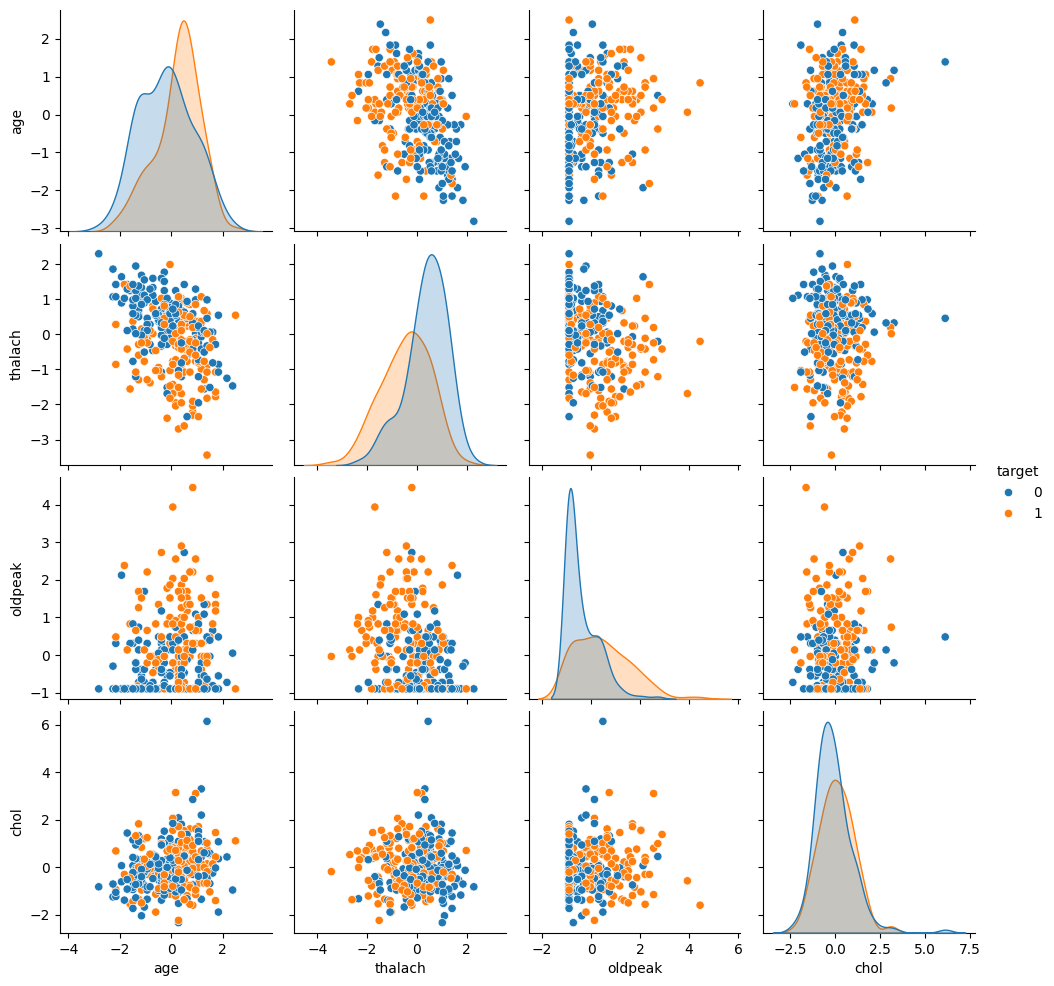

In [12]:
sns.pairplot(df, vars=['age', 'thalach', 'oldpeak', 'chol'], hue='target')


In [13]:
# Save cleaned data using config path
from config import CLEANED_DATA_PATH
df_encoded.to_csv(CLEANED_DATA_PATH, index=False)
print(f"✅ Saved cleaned data to {CLEANED_DATA_PATH}")

✅ Saved cleaned data to G:\Courses\Sprints_ML\Project\data\cleaned_data.csv
